In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_excel('C:/Users/admin/Desktop/tata motorstrain.xlsx')
dataset_train.shape

(2435, 7)

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,2019-07-10,156.25,156.25,149.10,151.65,151.65,31737826
1,2019-07-09,154.00,157.15,152.75,155.80,155.80,16112345
2,2019-07-08,159.35,159.50,153.50,154.55,154.55,15149035
3,2019-07-05,165.15,166.95,159.50,160.20,160.20,14374084
4,2019-07-04,162.50,167.75,162.00,165.20,165.20,19512938


In [5]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[156.25],
       [154.  ],
       [159.35],
       ...,
       [ 54.42],
       [ 53.39],
       [ 53.21]])

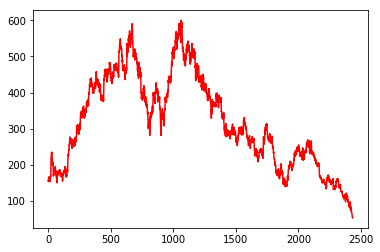

In [7]:
plt.plot(training_set, color = 'red', label = 'tata motorstrain Stock Price')

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.18837294],
       [0.1842596 ],
       [0.19404022],
       ...,
       [0.00221207],
       [0.00032907],
       [0.        ]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([0.23828154, 0.21899452, 0.22292505, ..., 0.67126143, 0.65398537,
       0.64340037])

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [11]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
# Initialising the RNN
regressor = Sequential()

In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [14]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
X_train.shape

(1198, 60, 1)

In [21]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0725
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0116
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0074
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0075
Epoch 5/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0073
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0073
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0067
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0061
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0066
Epoch 10/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0057
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0061
Epoch 

In [23]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_excel('C:/Users/admin/Desktop/tatadailytest.xlsx')
real_stock_price = dataset_test.iloc[:, 1:2].values

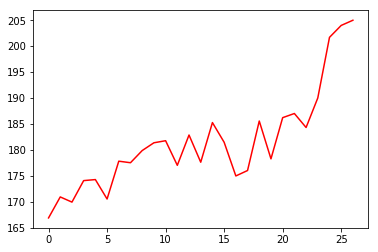

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'tata stock price')

In [31]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

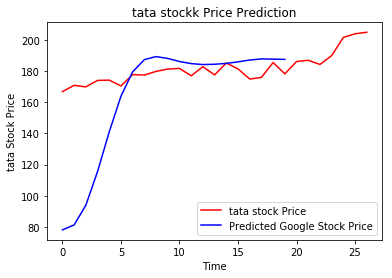

In [32]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'tata stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('tata stockk Price Prediction')
plt.xlabel('Time')
plt.ylabel('tata Stock Price')
plt.legend()
plt.show()